## ML Week 6 - Unsupervised Learning and More Vision

[Top](#ML-Week-6---Unsupervised-Learning-and-More-Vision) | [Previous week](#ML-Week-5---Artificial-Neural-Networks) | [Start of Lesson](#Part-1:-Intro-To-Unsupervised-Learning) | [Bottom](#Cheers)

Today's lesson will be on both unsupervised learning techniques and a continuation on from exploring the power of deep computer vision. This lesson will be broken down into:

* [Part 1: Intro To Unsupervised Learning](#Intro-To-Unsupervised-Learning)
* [Part 2: K-Means Clustering](#K-Means-Clustering)
* [Part 3: Non Linear K-Means](#Part-3:-Non-Linear-K-Means)
* [Part 4: Autoencoders](#Part-4:-Autoencoders)
* [Part 5: Convolutional Neural Networks (CNNs) (Optional)](#Part-5:-Convolutional-Neural-Networks-(CNNs)-(Optional))
* [Part 6: Using a Pretrained CNN](#Part-6:-Using-a-Pretrained-CNN)
* [Part 7: Applications of Deep Computer Vision](#Part-7:-Applications-of-Deep-Computer-Vision)

In [1]:
from __future__ import division
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import scale
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import pylab as pl
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import Binarizer
# %matplotlib notebook


## Part 1: Intro To Unsupervised Learning

Unsupervised learning is a branch of machine learning that only requires raw data input to make inferences. That is to say we don't need any data labels or external information. Within this field there are two main groups of tasks:

* Clustering: Where we try and group data points based on their inherent features
* Dimensionality Reduction: Where we try and reduce the number of features in our dataset

## Part 2: K-Means Clustering

The K-means algorithm is a fundamental clustering algorithm that can search for a predetermined number of clusters in an unlabeled multidimensional dataset. The definition of a valid k-means cluster is simple, it consists of both a 

* cluster center which is simply the average coordinate of all points in the cluster
* and clusters of points which are all closest to their respective cluster center than any other cluster center


We start with a very simple example of 4 blobs of data. 

### Exercise 

Just using your own visual intuition, try and classify the dataset into 4, 3 and 2 separate clusters. 

Text(0.5, 0, 'Likelyhood of buying a new smartphone')

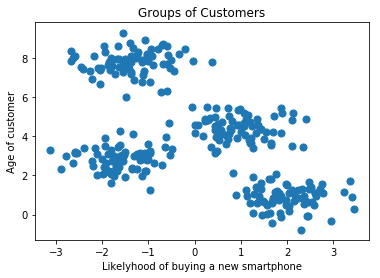

In [2]:
#Use SKLearn data generator
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);
plt.title("Groups of Customers")
plt.ylabel("Age of customer")
plt.xlabel("Likelyhood of buying a new smartphone")

What we just did manually can be done algorithmically using sklearns k-means implementation. We simply create a kmeans object with our desired clusters and fit the data much like any other machine learning algorithms.

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

We can now visualise the the cluster centers which are in black and also the data which has now been ascribed classes

Text(0.5, 0, 'Likelyhood of buying a new smartphone')

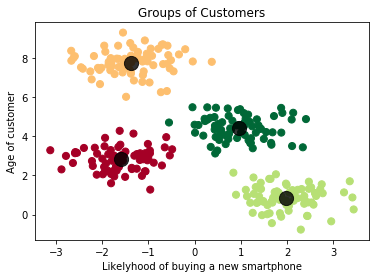

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='RdYlGn')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.8);
plt.title("Groups of Customers")
plt.ylabel("Age of customer")
plt.xlabel("Likelyhood of buying a new smartphone")

### Exercise

Run K-means with cluster sizes of 2 to 4 and see if it matches your visual predictions

## Part 3: Non Linear K-Means

Unfortunately like many machine learning algorithms the basic approaches fail on anything that's a little more complex. We can see below that the algorithm doesn't cluster the data as we would expect.

Text(0.5, 0, 'Amount of UVA sunlight')

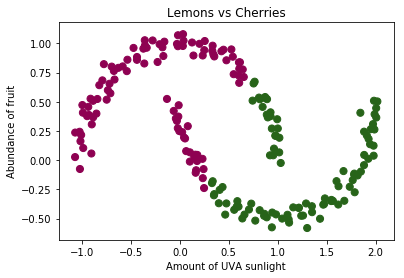

In [5]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='PiYG');
plt.title("Lemons vs Cherries")
plt.ylabel("Abundance of fruit")
plt.xlabel("Amount of UVA sunlight")


Luckily we can combat these problems by transforming them into linear problems in a higher dimensional space. This is exactly what spectral clustering does.

c:\users\user\appdata\local\programs\python\python35\lib\site-packages\sklearn\manifold\spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Text(0.5, 0, 'Amount of UVA sunlight')

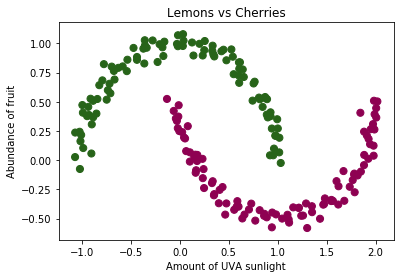

In [6]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='PiYG');
plt.title("Lemons vs Cherries")
plt.ylabel("Abundance of fruit")
plt.xlabel("Amount of UVA sunlight")

In [7]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

#Define a z scale based on the label value manually
r=np.where(labels==0,0,10)
def plot_3D(elev=30, azim=30, X=X, y=labels):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='PiYG')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90,0,10,40], azip=(-180, 180),
         X=fixed(X), y=fixed(y));



interactive(children=(Dropdown(description='elev', options=(-90, 0, 10, 40), value=-90), IntSlider(value=30, d…

## Part 4: Autoencoders

Autoencoders are a special type of artificial neural network that can learn data encodings in an unsupervised way. We call this data encoding a representation and the process of finding it "representation learning". We intentionally design an artifical neural network so that there is a bottleneck that forceably learns the most compressed representation of an input image. If there is some intrinsic structure in the inputs we should be able to learn a representation of it with much less data than the total input data. 

A basic overview of how this works can be seen in the image below. We put the image into the network, learn its compressed representation and then try and decode that representation back to get a reconstructed image.

<img src="img/autoencoder.png">


### Denoising Autoencoders

One particularly useful type of autoencoder is the denoising autoencoder. This variant allows us to try and learn a robust representation of our inputs by introducing random noise into the images. The encoder then hopefully learns how to ignore this noise and reconstruct clean images. This process is callled denoising. Below is a simple example of how to go about constructing a denoiser in Keras.

Using TensorFlow backend.


11493376/11490434 [==============================] - 8s 1us/step


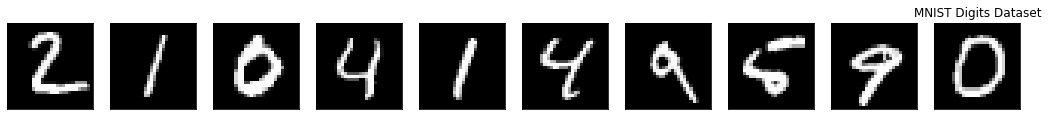

In [8]:
#Import basic mnist dataset
from keras.datasets import mnist
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model

n = 11  # how many digits we will display
plt.figure(figsize=(20, 4))

#Plot our original clean training images for analysis
(x_train, _), (x_test, _) = mnist.load_data()
for i in range(1,n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.title("MNIST Digits Dataset")
plt.show()


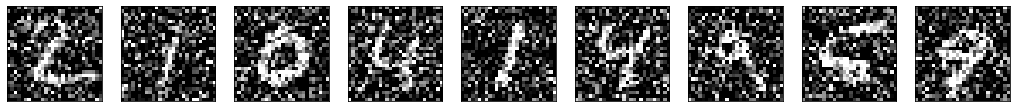

In [9]:
#Normalise all the inputs so they are between 0-1 as per last week
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
# Reshape the train images for our network if they aren't already
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

#Adjust how much noise we add to each training image
noise_factor = 0.5

#Multiply the noise to each pixel
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

#Plot some sample images that have had noise added to them
n = 10
plt.figure(figsize=(20, 2))
for i in range(1,n):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [10]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
from keras.callbacks import TensorBoard

#Input image with dimensions 28*28
input_img = Input(shape=(28, 28, 1))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32) and at it's most compressed stage

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

#Create the model representation
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
#Train the autoencoder with our noisy data versus our clean data for 1 epoch
autoencoder.fit(x_train_noisy, x_train,
                epochs=1,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])
# Set tensorboard dir to /tmp/tb

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 15s 245us/step - loss: 0.1910 - val_loss: 0.1290


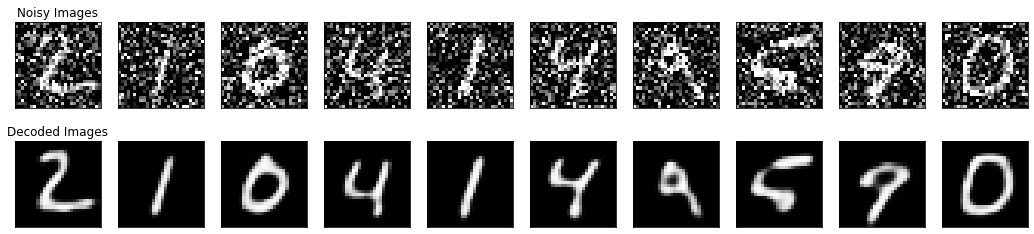

In [12]:
#Predict on our entire test set
decoded_imgs = autoencoder.predict(x_test)

n = 11
#Show 11 images for sample output to see how the network did
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display input noisy data
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstructed (hopefully) cleaned up data
    ax2 = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax2.get_xaxis().set_visible(False)
    ax2.get_yaxis().set_visible(False)
    if i==1:
        ax.set_title("Noisy Images")
        ax2.set_title("Decoded Images")


plt.show()

## Exercise

What happens if we crank the noise up even more? Try and modify the code such that the data is distorted even further and report your findings

## Thinking Time

Can you think of any other uses for autoencoders?
Why do the images look blurry when we decode them?

## Tensorboard (Optional) (Advanced)

Tensorboard is a tool for TensorFlow that allows us to visualise the intricacies of our neural networks. It's beyond the scope of this short course but if you're doing any other deep learning stuff it's always good to be in the know about tools that are used by academics and professionals. To visualise the training of the previous autoencoder we can use the command

`tensorboard --logdir=/tmp/tb`

You should get a graph that looks similar to this 

<img src="img/tensorboard.png" width="500px">


## Part 5: Convolutional Neural Networks (CNNs) (Optional)

CNNs are a fundamental part of deep computer vision. They are a primary contributor to the computer vision revolution that's unfolding. Whilst CNNs are very complex to underestand we will try to get a very very basic intuition between how they work and then later on the lesson we can see the phenomenal things they are able to do. 


### What does a CNN look like?

<img src="img/cnn.png" width="1000px">

A typical CNN consists of just a series of convolutional layers and pooling layers stacked on top of each other in a similar way to what we saw last week with a normal neural network. If the network has more than one convolutional layer then we sometimes refer to it as a deep convolutional network (DCNN) but usually a CNN is implied to be deep anyway so CNN is used universally. 

### Convolutional Intuition

The intuition behind using convolutions is rooted in how animal visual cortexes operate. The basic premise is that data which is spatially closer to a single point is more relevant to that point then data which is spatially further away. The image below shows that with a sunflower, the two sliding "windows" over the sunflower head are more relevant to each other then the other random window which sees the sky.

<img src="img/cnn_intuition.png" width="700px">

### Convolutional Layers (Advanced)

This is a rather complicated concept to understand so don't worry at all if you have no clue what's going on. In essence a convolutional layer is just a collection of filters which can be learned by the network to decipher images. 

<img src="img/cnn_example.png" width="700px">

Whenever an image is passed to a layer the layer computes its "convolution" by sliding over the whole image with each image filter as seen above.

These image filters are how the network learns to see. At the start of the network we hope to learn primitive features like edges and blobs and then by the end we try to learn highly complex features like textures, patterns and whole object representations.

<img src="img/filters_better.png" width="1000px">

### How Do We Train CNNs?

To train a CNN we need a lot data. One of the most famous datasets is the ImageNet dataset which contains 14 million classification labels and 1 million bounding box annotations. There are 20 000 classes in total but we usually work with a cut down set of the most popular 1000 classes of object. You can view and explore all the classes at the [Imagenet Website](http://image-net.org/explore). As described last week we simply feed in an imput image to the network and try and see if the network can learn to predict its class label. The process is identical to the non convolutional example we did last week the only differences lie in the internals of the network.

### Pretrained Models

Often the resources needed to train a neural network from scratch are excessive. Luckily for us neural network trained models are shareable just like any other computer data. Researchers will often post what we call pretrained models on file hosting services so other researchers and users can immediately start using the model. These pretrained models are often trained on large public datasets like [imagenet](http://www.image-net.org/) and [COCO](http://cocodataset.org/).

### Retraining Models and Transfer Learning (Advanced)

One little quirk about neural network models is that once they've been shared, it's possible to unfreeze them and resume training. It's also possible to add onto them and undergo what we call "network retraining". One major advantage of doing this is we are able to do transfer learning. Transfer learning allows us to take knowledge learned in one domain and apply it to another. 

The image below shows illustratively how this works. 

<img src="img/transferlearning.png" width="600px">


## Part 6: Using a Pretrained CNN

The next exercise will be using a pretrained model trained on imagenet to classify some images. This model is the saved weights of a convolutional neural network that has been uploaded by another ML enthusiast for us to use. The default implementation below uses mobilenetV2 and you can read a gentle introduction to its advantages on [Google's blog](https://ai.googleblog.com/2018/04/mobilenetv2-next-generation-of-on.html).

### Exercise

See if you can switch out the pretrained model to another one by using my commented code. If you understand the code see if you can then switch it to an even deeper network using a [keras applications network](https://keras.io/applications/).

In [14]:
#Import and use the mobilenetv2 backbone
!pip install requests
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications.mobilenet_v2 import decode_predictions
from keras.applications.mobilenet_v2 import preprocess_input
from keras.preprocessing.image import img_to_array

#initialise the mobilenetv2 model
model = MobileNetV2()

#This is a deeper and larger network, resnet50
#Uncomment the code block below to explore how a bigger brain tackles this problem


# from keras.applications.resnet50 import ResNet50
# from keras.applications.resnet50 import decode_predictions
# from keras.applications.resnet50 import preprocess_input
# from keras.preprocessing.image import img_to_array

# model = ResNet50()

from PIL import Image
import requests
from io import BytesIO

#Substitute with your own image URL, make sure its a jpeg file and roughly square
#Images that are already size 250x250 or there abouts work well 

#Change the url variable
url = 'http://www.grmicek.si/images/Banana.jpg'

#Test with a cat later by renaming variable
url_cat = 'https://upload.wikimedia.org/wikipedia/commons/thumb/1/14/Gatto_europeo4.jpg/250px-Gatto_europeo4.jpg'


#Serialise the internet url into a PIL image
response = requests.get(url)
image = Image.open(BytesIO(response.content))
#Crop the image to our network dimensions
image = image.crop((0, 0, 224, 224))
image = img_to_array(image)
import numpy as np
arr_image = np.array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)

#Run the prediction on our image
yhat = model.predict(image)

#Get our output prediction and confidence
label = decode_predictions(yhat)
label = label[0][0]

#Output that confidence
print('The network has predicted the image is a {} with {}% confidence'.format(label[1], label[2] * 100))


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



40960/35363 [==================================] - 0s 8us/step
The network has predicted the image is a banana with 84.48991179466248% confidence


### Dissecting a Convolutional Neural Network
Now that we have made our prediction on the network we want to try and see inside to know what the networks up to. A common misconception about neural networks is that they are a complete "black box". Whilst it can be difficult to actually understand why networks make the predictions they do, when using image data we can visualise each activation at each layer as an image itself. 

Below we do that using the [keract module](https://github.com/philipperemy/keract) which automatically extracts the feature activations from each layer and plots the results using a nice colour map.

block_5_expand_1/convolution:0 (1, 28, 28, 192) 


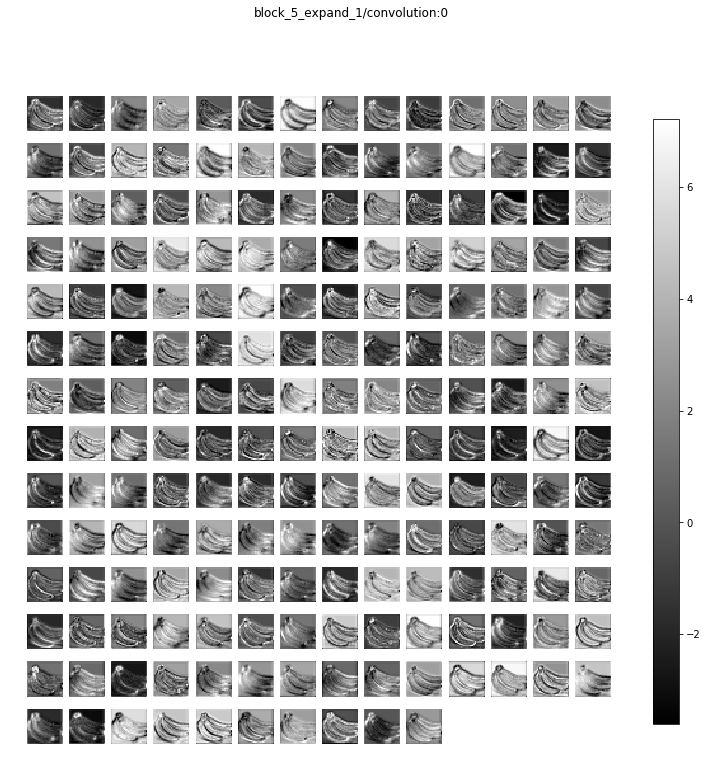

block_7_depthwise_1/depthwise:0 (1, 14, 14, 384) 


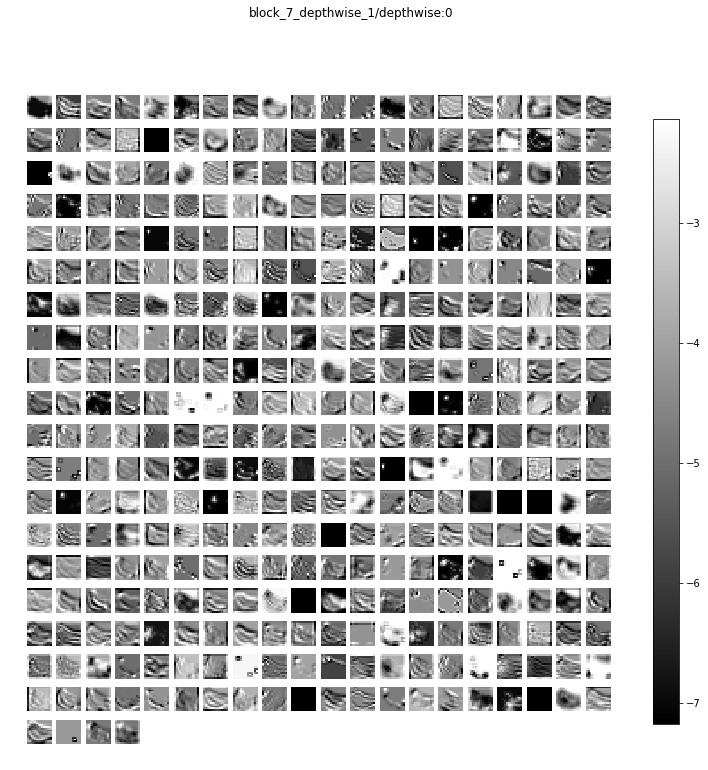

expanded_conv_depthwise_1/depthwise:0 (1, 112, 112, 32) 


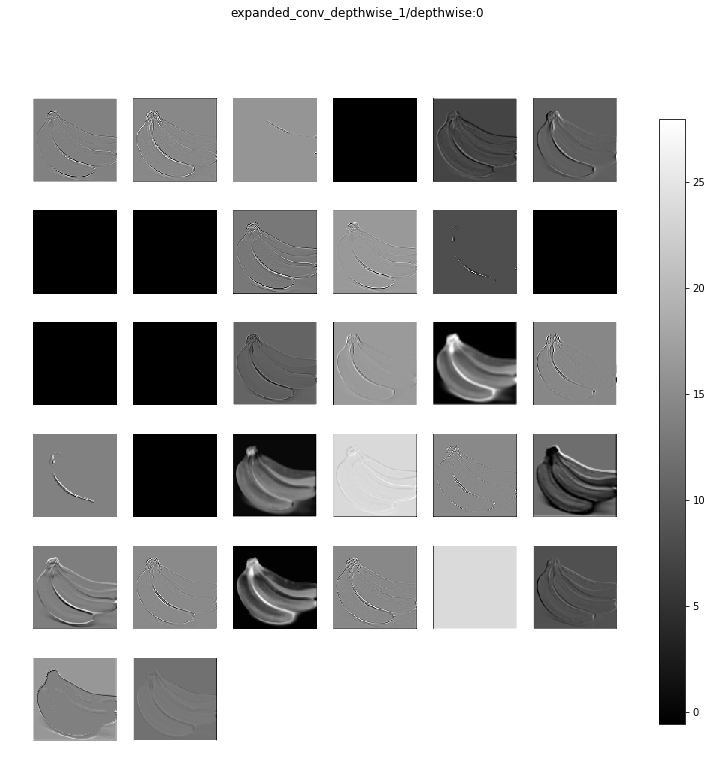

expanded_conv_depthwise_relu_1/Relu6:0 (1, 112, 112, 32) 


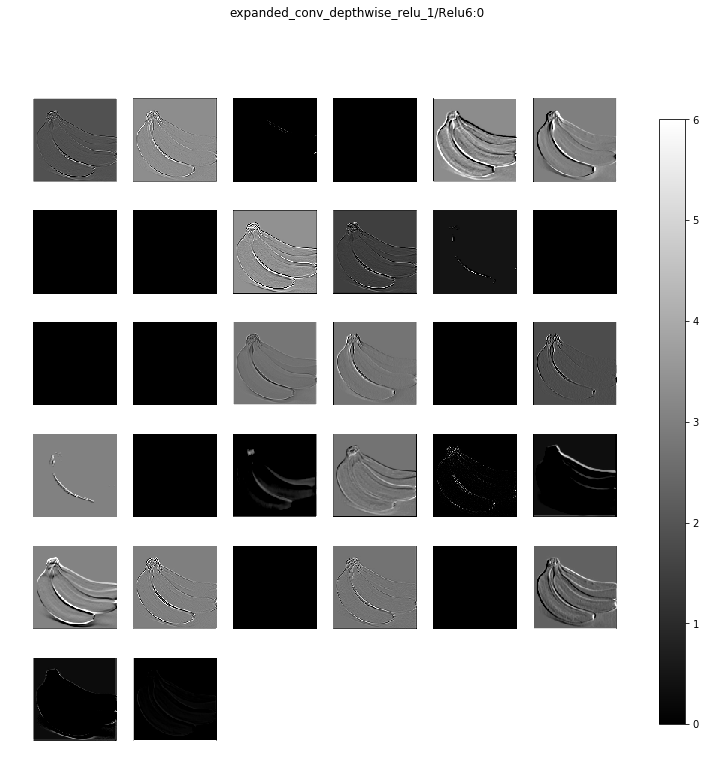

block_11_expand_1/convolution:0 (1, 14, 14, 576) 


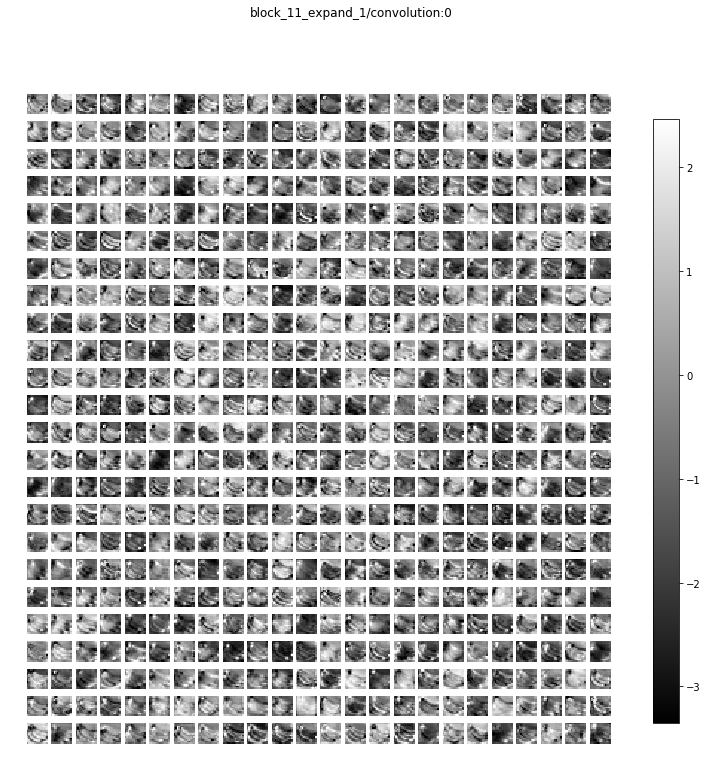

block_8_depthwise_relu_1/Relu6:0 (1, 14, 14, 384) 


KeyboardInterrupt: 

In [15]:
!pip install keract

import keract
activations = keract.get_activations(model, image)

#banana_lit =activations.get('block_2_expand_BN_9/cond/Merge:0')
#print(activations.keys()) #prints keys

#Just a note this function takes a very long time to output all the plots.
#I recommend running it only for a little while to see the first few outputs
keract.display_activations(activations)

Another cool thing we can look at using keract is a heatmap. The heatmap output shows us where the layers are showing the strongest activations. This lets us see what it's paying attention to in each image, on each layer. Visualising this can help us computer scientists decode what the network neurons have learned about each particular class throughout each layer. It can also help us compare how an ANN sees objects vs humans which is interesting in it's own right!

block_5_expand_1/convolution:0 (1, 28, 28, 192) 


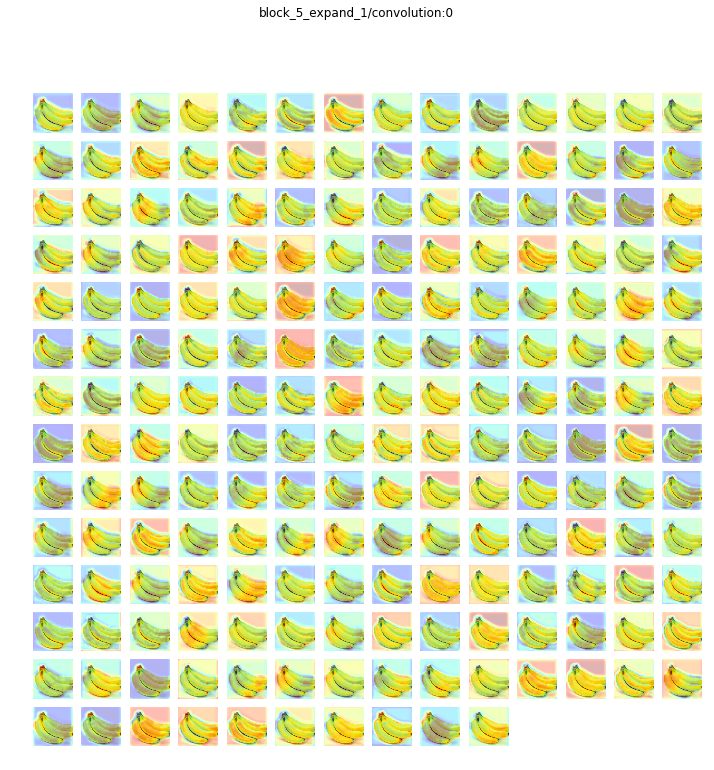

block_7_depthwise_1/depthwise:0 (1, 14, 14, 384) 


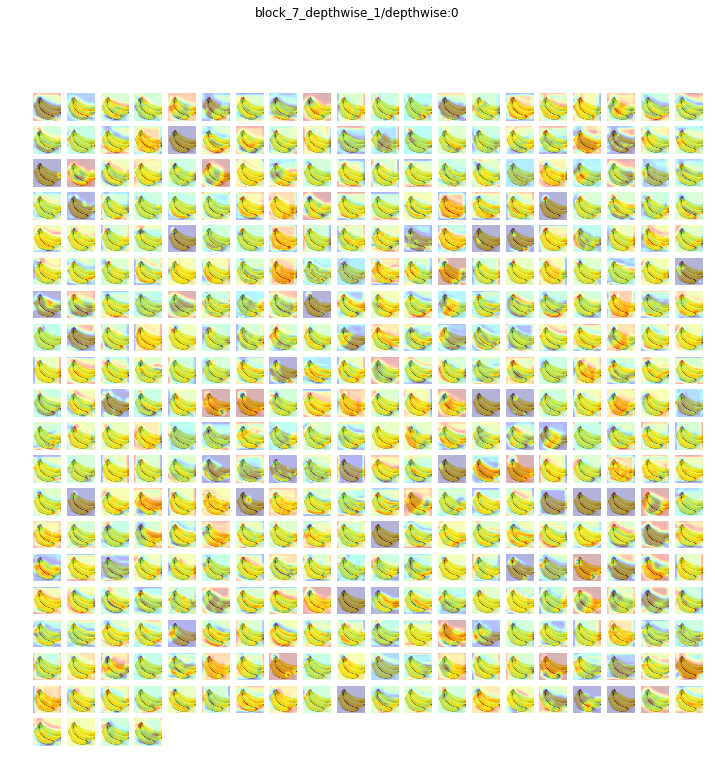

expanded_conv_depthwise_1/depthwise:0 (1, 112, 112, 32) 


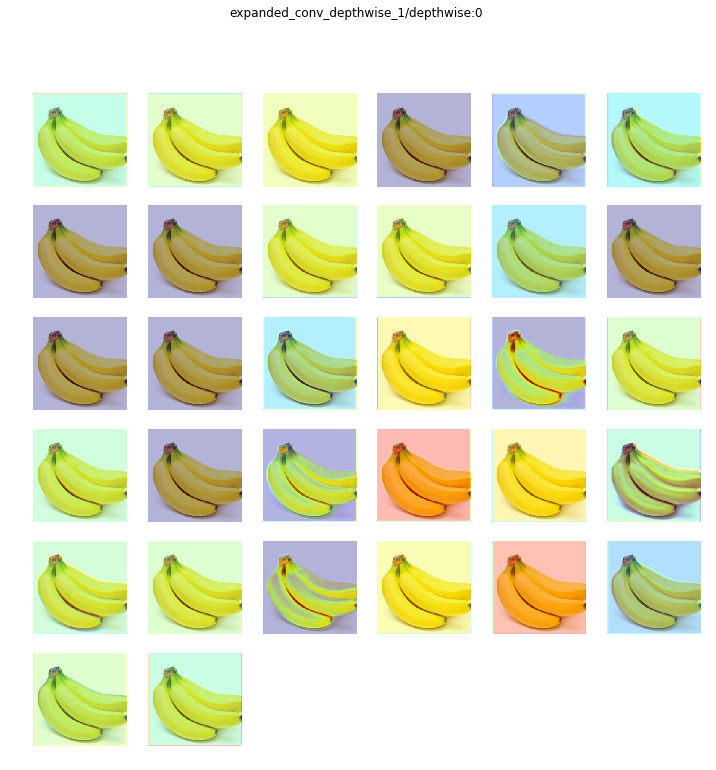

expanded_conv_depthwise_relu_1/Relu6:0 (1, 112, 112, 32) 


KeyboardInterrupt: 

In [16]:
from keract import display_heatmaps

#Just a note this function takes a very long time to output all the plots.
#I recommend running it only for a little while to see the first few outputs
display_heatmaps(activations, arr_image, save=False)

## Thought Exercise

Is there anything in the feature filters that you find interesting?
In your opinion does the network pick out similar features to your own brain?
Why do you think we need to have so many filters and representations?

# Part 7: Applications of Deep Computer Vision

Deep computer vision applications are almost endless. With the rate the technology is advancing hundreds of new applications are being discovered, turned into companies and incorporated into business processes. This section will touch on a few of the big categories in computer vision and what it might mean for the future.

## Fundamental Problems

### Image Classification

[Image classification](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks) is the the problem of learning to discriminate between images. We teach a network to label each image with a single class. We did this before with the imagenet classifier and the banana.

### Image Captioning

[Image captioning](https://arxiv.org/pdf/1810.04020.pdf) is the problem of trying to explain what's happening in an image with natural language.

<img src="img/captioning.png" width="600px">


### Object Detection

[Object detection](https://arxiv.org/abs/1506.01497) is the problem of trying to locate all the objects of our classes in an image and put a bounding rectangle around them.

<img src="img/detection.jpg" width="600px">


### Segmentation

[Segmentation](https://people.eecs.berkeley.edu/~jonlong/long_shelhamer_fcn.pdf) is where we locate all the objects of our classes then assign relevant pixels in the image a class. [Semantic instance segmentation](https://arxiv.org/abs/1703.06870) can also differentiate between instances of the same class!

<img src="img/segmentation.png" width="600px">

Panoptic segmentation is a special case that combines both normal segmentation and instance segmentation to ensure every single pixel is labeled.

<img src="img/panoptic.jpg" width="600px">

### Pose Estimation

Pose estimation is the broad task of predicting an objects 3D pose (that is its location and orientation). Typically when we refer to pose estimation we are talking about human pose estimation that can be [2D](https://arxiv.org/abs/1611.08050), [3D](https://arxiv.org/abs/1903.10153), [Dense](https://arxiv.org/abs/1802.00434) and a few other variations. The other side of pose estimation is for [general object 6D pose](https://arxiv.org/abs/1711.00199v3) (x,y,z,pitch,roll,yaw) 

<img src="img/densepose.jpg" width="600px">

<img src="img/6dpose.png" width="600px">


## Real World Implementations

### Cancer detection

<img src="img/cancer.png" width="600px">

### Agricultural Monitoring

<img src="img/hyperspectral.jpg" width="600px">


### Surveillance
<img src="img/cctv.png" width="600px">

<img src="img/cctvcaught.png" width="600px">


### Robotic Vision 

Self driving cars

<img src="img/sdc.jpg" width="600px">

Humanoid Robots

[Watch the boston dynamics video with Atlas](https://www.youtube.com/watch?v=LikxFZZO2sk)

if that doesn't scare you maybe [petman will](https://www.youtube.com/watch?v=tFrjrgBV8K0)

## Exercise

Can you think of any other applications of AI you have seen in the wild?

Can you think of any new applications that use AI to solve a real world problem?

## Game Playing (Optional)

Recent advances in neural networks have given computers the leg up in difficult to solve games versus humans. Whilst chess and other smaller search space games have been solved by traditional algorithms many years ago, more complex games like Go, or DOTA2 have never had AI that could compete with humans.

You can learn about how Deepmind (Google AI researchers) conquered Go [here](https://deepmind.com/research/alphago/) and learn about how OpenAI managed to beat top teams at Dota2 [here](https://openai.com/five/).



## Cheers
Congrats on getting this far in machine learning and artificial intelligence! This is a fast moving and exciting field to be a part of. Even if you don't understand a lot technically, a little knowledge in this area may prove to be useful in the future and always makes for good conversations over food and drink!

Feel free to ask me any questions about anything! 

[Top](#ML-Week-6---Unsupervised-Learning-and-More-Vision) | [Previous week](#ML-Week-5---Artificial-Neural-Networks) | [Start of Lesson](#Part-1:-Intro-To-Unsupervised-Learning) | [Bottom](#Cheers)

* [Part 1: Intro To Unsupervised Learning](#Intro-To-Unsupervised-Learning)
* [Part 2: K-Means Clustering](#K-Means-Clustering)
* [Part 3: Non Linear K-Means](#Part-3:-Non-Linear-K-Means)
* [Part 4: Autoencoders](#Part-4:-Autoencoders)
* [Part 5: Convolutional Neural Networks (CNNs) (Optional)](#Part-5:-Convolutional-Neural-Networks-(CNNs)-(Optional))
* [Part 6: Using a Pretrained CNN](#Part-6:-Using-a-Pretrained-CNN)
* [Part 7: Applications of Deep Computer Vision](#Part-7:-Applications-of-Deep-Computer-Vision)